<a href="https://colab.research.google.com/github/KenzaB27/TransUnet/blob/main/TransUNet_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Image Segmentation with Vision Transformers as a strong Encoder


In this notebook, we provide a demo of the work available in this [repo](https://github.com/KenzaB27/TransUnet). 

TransUNet is a hybrid CNN-Transformer in a U-shaped architecture able to leverage both detailed high-resolution spatial information from CNN features and the global context encoded by Transformers in order to perform medical image segmentation.

TansUNet was proposed by J.Chen et al. [in Feb 2021](https://arxiv.org/pdf/2102.04306.pdf).

We reproduced the work of the paper above as part of the course Deep Learning in Data Science DD2424 @ [KTH](https://www.kth.se/en). 

Authors:
*   [Agnieszka Miszkurka](https://www.linkedin.com/in/agnieszka-miszkurka/)
*   [Tobias Höppe](https://www.linkedin.com/in/tobias-h%C3%B6ppe-3b3398199/)
*   [Kenza Bouzid](https://www.linkedin.com/in/kenza-bouzid/?locale=en_US)

# Environment Set Up

In [ ]:
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6' -O- | sed -E 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6" -O 224_transunet_train_all_data2.zip && rm -rf /tmp/cookies.txt
#!unzip 224_transunet_train_all_data2.zip
#!rm -r 224_transunet_train_all_data2.zip

In [7]:
#!git clone https://github.com/KenzaB27/TransUnet.git
%cd TransUnet
#!pip install -r requirements.txt

[Errno 2] No such file or directory: 'TransUnet'
/Users/Kai/Documents/Coding/Projekte/Exo Projekt Wiki GIT/Eigene Experimente/Transformer/TransUnet-demo/TransUnet


In [4]:
import data_processing.data_parser as data_parser
import models.transunet as transunet
import utils.visualize as visualize
import experiments.config as conf
import importlib

# TransUNet in Action 

In [5]:
BATCH_SIZE=1

### Load Model and Test Dataset 

In [11]:
saved_model_path = "224_transunet_train_all_data2/model"
config = conf.get_transunet()
network = transunet.TransUnet(config)
network.load_model(saved_model_path=saved_model_path)

In [12]:
importlib.reload(data_parser)
data_reader = data_parser.DataReader(src_path="synapse_ct_scans/", height=224, width=224, depth=3)
test_dataset = data_reader.get_test_data(image_size=224, use_self_filenames=True, shuffle=True)

## Segment Synapse multi-organ slices

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


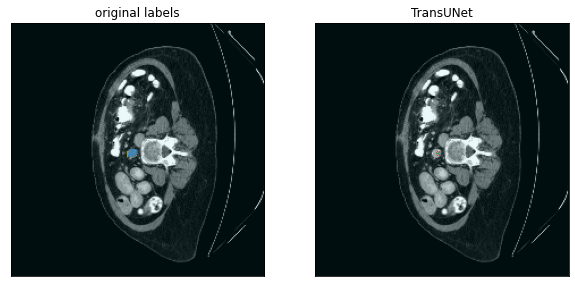

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 362ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


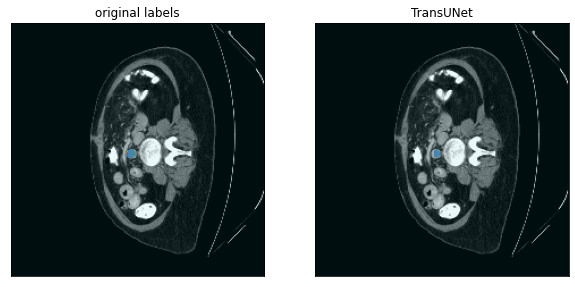

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 446ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


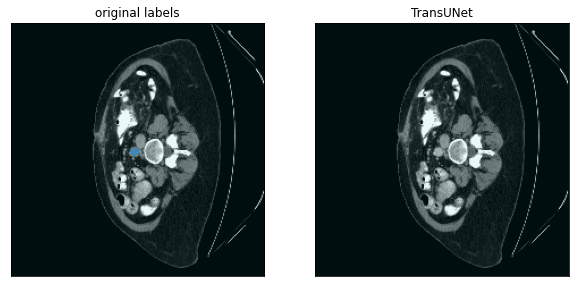

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 384ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


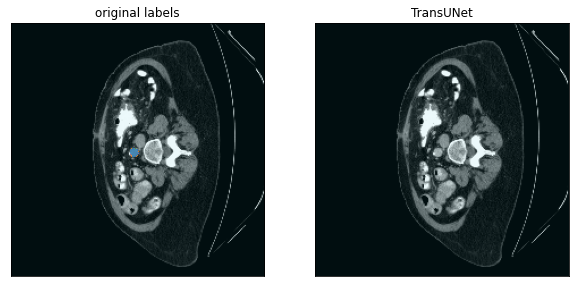

In [13]:
for i, img_lab in enumerate(test_dataset.take(32)):
  img = img_lab[0]
  lab = img_lab[1]
  visualize.visualize_non_empty_predictions(img, lab, [network])